In [1]:
# Make sure in shape environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import sklearn.manifold as skm
%matplotlib inline

In [19]:
import ast
f = open('GoodPots/PotIndex.txt','r')
index = f.readlines()
a = []
for x in range(len(index)):
    a.append(ast.literal_eval(index[x]))
import matplotlib.colors as mcolors
c = list(mcolors.CSS4_COLORS)
pots = np.loadtxt('GoodPots/GoodPots_closed_procrustes.csv',delimiter=',')
npots = np.shape(pots)[0]
npoints = np.shape(pots)[1]//2
pots = np.reshape(pots,[npots,npoints,2])

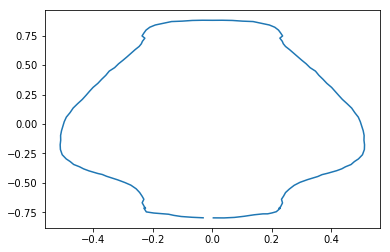

In [56]:
# This reads VTK
import vtk
from vtk.util import numpy_support

def readvtk(file):
    reader = vtk.vtkPolyDataReader()
    reader.SetFileName(file)
    reader.Update()
    data = reader.GetOutput()
    pts = numpy_support.vtk_to_numpy(data.GetPoints().GetData()).astype('float64')
    return pts

file = './deformetrica/PGA/output/PrincipalGeodesicAnalysis__EstimatedParameters__Template_goodpot.vtk'
pts = readvtk(file)
pl.plot(pts[:,0],pts[:,1])
pl.show()

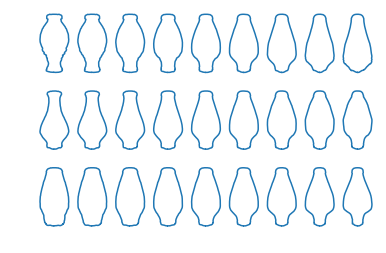

In [63]:
file = './deformetrica/PGA/output/PrincipalGeodesicAnalysis__PrincipalDirection__'
for i in range(3):
    for j in range(9):
        f = file+str(i)+'_'+str(j)+'.vtk'
        pts = readvtk(f)
        pl.subplot(3,9,i*9+j+1)
        pl.plot(pts[:,0],pts[:,1])
        pl.axis('off')

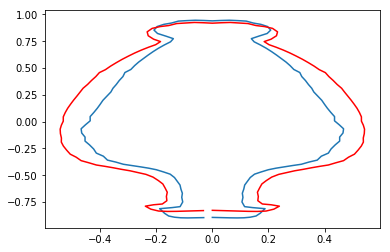

In [54]:
#file = './deformetrica/PGA/output/PrincipalGeodesicAnalysis__Reconstruction__goodpot__subject_0.vtk'
#file = './deformetrica/atlas/output/DeterministicAtlas__flow__goodpot__subject_1__tp_10.vtk'
file = './deformetrica/atlas/output/DeterministicAtlas__Reconstruction__goodpot__subject_100.vtk'
pts = readvtk(file)
pl.plot(pts[:,0],pts[:,1])
pl.plot(pots[312,:,0],pots[312,:,1],'r-')


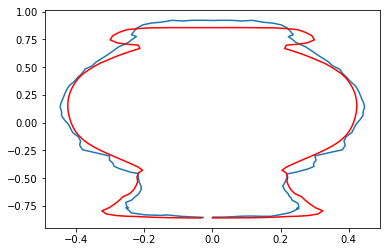

In [64]:
#file = './deformetrica/atlas/output/DeterministicAtlas__Reconstruction__goodpot__subject_2.vtk'
#file = './deformetrica/atlas/output/DeterministicAtlas__EstimatedParameters__Template_goodpot.vtk'
file = './deformetrica/PGA/output/PrincipalGeodesicAnalysis__Reconstruction__goodpot__subject_5.vtk'
pts = readvtk(file)
pl.plot(pts[:,0],pts[:,1])
pl.plot(pots[96,:,0],pots[96,:,1],'r-')

In [67]:
dir = np.loadtxt('./deformetrica/PGA/output/PrincipalGeodesicAnalysis__EstimatedParameters__PrincipalDirections.txt')

In [73]:
pos = np.loadtxt('./deformetrica/PGA/output/PrincipalGeodesicAnalysis__EstimatedParameters__LatentPositions.txt')

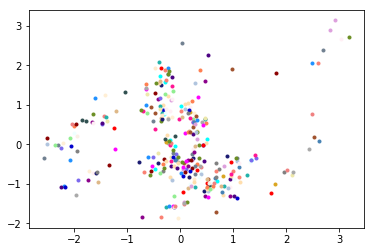

In [77]:
for i in range(325):
    pl.plot(pos[i,1],pos[i,2],'.',color=c[4*a[i][2]])

In [113]:
p = np.genfromtxt('./deformetrica/atlas/output_0.1/DeterministicAtlas__EstimatedParameters__Momenta.txt',skip_header=2,delimiter=' ') 
q = np.genfromtxt('./deformetrica/atlas/output_0.1/DeterministicAtlas__EstimatedParameters__ControlPoints.txt',skip_header=2,delimiter=' ') 
p = np.reshape(p,[325,198,2])

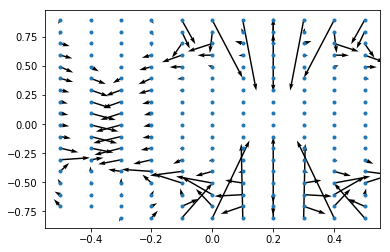

In [114]:
pl.plot(q[:,0],q[:,1],'.')
pl.quiver(q[:,0],q[:,1],p[0,:,0],p[0,:,1])

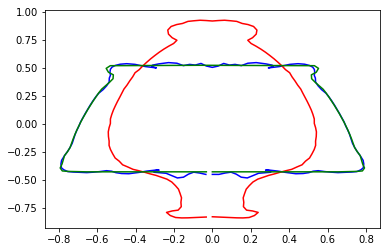

In [111]:
file = './deformetrica/atlas/output_0.1/DeterministicAtlas__Reconstruction__goodpot__subject_0.vtk'
pts = readvtk(file)
pl.plot(pts[:,0],pts[:,1],'b')
# This is the template
pl.plot(pots[312,:,0],pots[312,:,1],'r-')
# And this is the target
pl.plot(pots[177,:,0],pots[177,:,1],'g-')

In [125]:
# Get the distance (as average square momenta)
s = np.sum(p*p,axis=1)
s = np.sum(s,axis=1)
order = np.argsort(s)

In [130]:
np.max(s)

2.0015526558163774